In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Інсталюємо пакети якщо нема за допомогою
#install.packages("dplyr")
#install.packages("ggplot2")

In [3]:
setwd("/home/olexandr/Documents/GitHub/Statistics_R/data_source")

In [4]:
flats <- read.csv("flats.csv", stringsAsFactors=FALSE, encoding="UTF-8")

In [5]:
#Визначимо клас обє'кта flats
class(flats)

[1] "data.frame"

In [6]:
#В R ви можете використовувавит функцію str(скорочення від structure) щоб швидко оцінити, чи правильно зчиталися ваші дані.
str(flats)

'data.frame':	839 obs. of  4 variables:
 $ Місто         : chr  "Вінниця" "Вінниця" "Вінниця" "Вінниця" ...
 $ Кімнат        : int  3 3 2 2 3 1 3 3 1 6 ...
 $ Загальна_площа: chr  "120" "66" "66" "44" ...
 $ Ціна          : num  1875000 975000 1375000 637500 835000 ...


Бачимо, що в якості десяткового розділювача по замовчуванню використовується
крапка dec ='.'. А в наших даних десятковим розділювачем є кома.

In [8]:
#Заново зчитаємо дані, вказавши параметр десяткового розділювача:
flats <- read.csv("flats.csv", stringsAsFactors=FALSE, dec= ",")

In [10]:
#Знов перевіримо структуру
str(flats)

'data.frame':	839 obs. of  4 variables:
 $ Місто         : chr  "Вінниця" "Вінниця" "Вінниця" "Вінниця" ...
 $ Кімнат        : int  3 3 2 2 3 1 3 3 1 6 ...
 $ Загальна_площа: num  120 66 66 44 63 31 46 64 35 200 ...
 $ Ціна          : num  1875000 975000 1375000 637500 835000 ...


Дослідження даних

In [13]:
dim(flats)

[1] 839   4

In [15]:
head(flats, 6)

,Місто,Кімнат,Загальна_площа,Ціна
,<chr>,<int>,<dbl>,<dbl>
1,Вінниця,3,120,1875000
2,Вінниця,3,66,975000
3,Вінниця,2,66,1375000
4,Вінниця,2,44,637500
5,Вінниця,3,63,835000
6,Вінниця,1,31,562500


In [17]:
names(flats)

[1] "Місто"          "Кімнат"         "Загальна_площа" "Ціна"

Трансформація даних

In [20]:
summary(flats)

    Місто               Кімнат      Загальна_площа        Ціна         
 Length:839         Min.   :1.000   Min.   : 14.00   Min.   :   10200  
 Class :character   1st Qu.:1.000   1st Qu.: 43.75   1st Qu.:  537500  
 Mode  :character   Median :2.000   Median : 56.00   Median :  775000  
                    Mean   :2.045   Mean   : 64.07   Mean   : 1042710  
                    3rd Qu.:3.000   3rd Qu.: 75.00   3rd Qu.: 1200000  
                    Max.   :6.000   Max.   :222.60   Max.   :12250000  

In [22]:
glimpse(flats)

Rows: 839
Columns: 4
$ Місто          <chr> "Вінниця", "Вінниця", "Вінниця", "Вінниця", "Вінниця", …
$ Кімнат         <int> 3, 3, 2, 2, 3, 1, 3, 3, 1, 6, 2, 1, 1, 2, 3, 3, 3, 2, 1…
$ Загальна_площа <dbl> 120.00, 66.00, 66.00, 44.00, 63.00, 31.00, 46.00, 64.00…
$ Ціна           <dbl> 1875000, 975000, 1375000, 637500, 835000, 562500, 11500…


In [24]:
#Дізнаємося, яка кількість квартир продається у кожному місті(згідно цього набору даних):
count(flats, Місто)

Місто,n
<chr>,<int>
Івано-Франківськ,47
Вінниця,275
Дніпропетровськ,18
Запоріжжя,13
Києво-Святошинський,19
Київ,186
Львів,16
Миколаїв,15
Одеса,43


In [26]:
# Посортуємо дані по кількості квартир у кожному місті у зростаючому порядку:
flats %>%
    count(Місто) %>%
    arrange(n)

Місто,n
<chr>,<int>
Запоріжжя,13
Харків,14
Миколаїв,15
Львів,16
Дніпропетровськ,18
Києво-Святошинський,19
Рівне,23
Одеса,43
Івано-Франківськ,47


Як бачимо, Києво-Святошинський район виділений в окреме місто. Можливо тому,
що його адміністративним центром є місто Київ.
Вилучимо ці дані з відображення використовуючи команду filter. Нагадаю, що
умова дорівнює позначається як ==, а не дорівнює як !=. Також посортуємо
результати в спадаючому порядку для цього вкажемо arrange(desc(n)).

In [29]:
flats %>%
  filter(Місто != "Києво-Святошинський") %>%
  filter(Кімнат == 3) %>%
  count(Місто) %>%
  arrange(desc(n)) # arrange - сортування, desc - спадаючий порядок

Місто,n
<chr>,<int>
Вінниця,60
Київ,50
Тернопіль,24
Хмельницький,22
Івано-Франківськ,13
Одеса,11
Дніпропетровськ,8
Запоріжжя,8
Рівне,6


In [31]:
#Якщо нас цікавлять кількість двокімнатних квартир в кожному місті, то виберемо лише квартири з кількістю кімнат 2:
flats %>%
  filter(Кімнат == 2) %>%
  filter(Місто != "Києво-Святошинський") %>%
  count(Місто) %>%
  arrange(desc(n))

Місто,n
<chr>,<int>
Вінниця,93
Київ,67
Тернопіль,43
Хмельницький,28
Одеса,18
Івано-Франківськ,14
Рівне,8
Миколаїв,7
Харків,7


Функція summarise дозволяє узагальнити дані. Наприклад, знайти середнє значення
площі квартир в кожному регіоні. Для обрахунку середнього значення використаємо
функцію mean.

In [34]:
flats %>%
  filter(Кімнат == 1) %>%
  filter(Місто != "Києво-Святошинський") %>%
  summarise(mean(Загальна_площа))

mean(Загальна_площа)
<dbl>
39.91854


Можна обчислити не лише площу, але й середньоквадратичне відхилення з
допомогою функції sd:

In [37]:
flats %>%
  filter(Кімнат == 2) %>%
  filter(Місто != "Києво-Святошинський") %>%
  summarise(mean(Загальна_площа), sd(Загальна_площа))

mean(Загальна_площа),sd(Загальна_площа)
<dbl>,<dbl>
60.81832,16.61458


Можна перейментувати назви стовпців, наприклад mean=mean(Загальна_площа):

In [40]:
flats %>%
  filter(Кімнат == 1) %>%
  filter(Місто != "Києво-Святошинський") %>%
  group_by(Місто) %>%
  summarise(mean=median(Загальна_площа), sd=sd(Загальна_площа))

Місто,mean,sd
<chr>,<dbl>,<dbl>
Івано-Франківськ,40.7,4.989404
Вінниця,40.0,7.665871
Дніпропетровськ,32.0,NA
Запоріжжя,36.4,9.050967
Київ,39.0,8.015938
Львів,43.0,6.269465
Миколаїв,37.5,6.363961
Одеса,39.0,5.015531
Рівне,35.0,13.086362


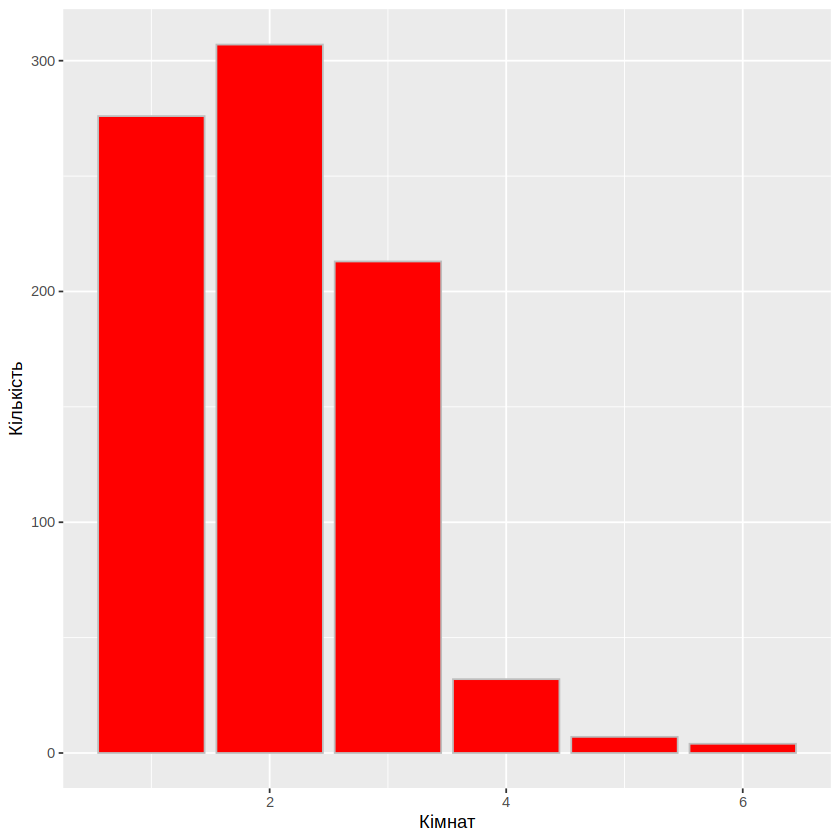

In [54]:
#Побудуємо стовпчикову діаграму для кількості кімнат:
ggplot(flats, aes(x=Кімнат)) +
  geom_bar(fill="red",
           col="gray") +
  ylab('Кількість')

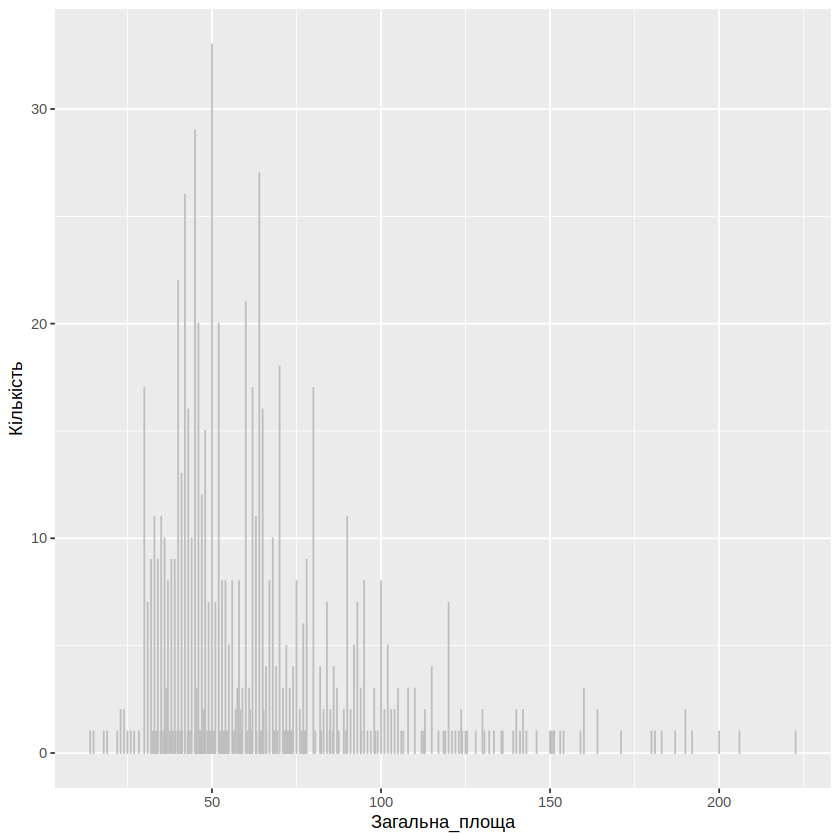

In [56]:
#Побудуємо стовпчикову діаграму для змінної загальна площа:
ggplot(flats, aes(x=Загальна_площа)) +
  geom_bar(fill="lightblue",
           col="grey") +
  ylab('Кількість')

Гістограма
Використовується для оцінки форми розподілу кількісної змінної. На цьому графіку
розподіл квартир, які продаються за загальною площею.

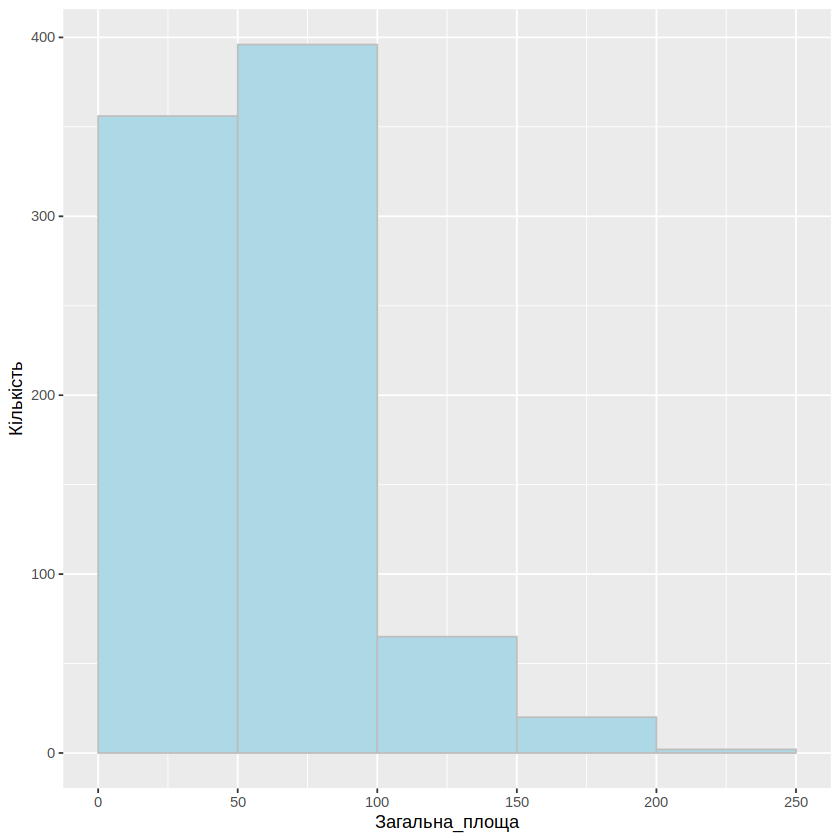

In [58]:
ggplot(flats, aes(x=Загальна_площа)) +
  geom_histogram(breaks=seq(0, 250, by = 50),
                 fill="lightblue",
                 col="grey") +
  ylab('Кількість')

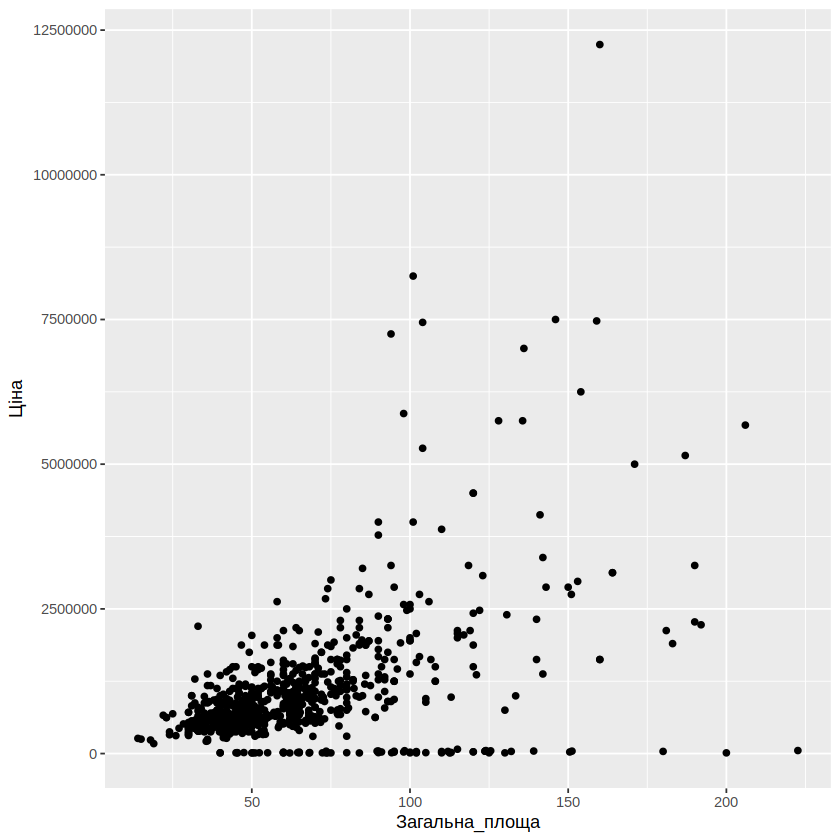

In [62]:
# Графік розсіювання. Побудуємо графік залежності ціни від загальної площі.
ggplot(flats, aes(x=Загальна_площа, y=Ціна)) +
  geom_point() 

Коробчата діаграма
Порівняємо розподіл цін по містах:

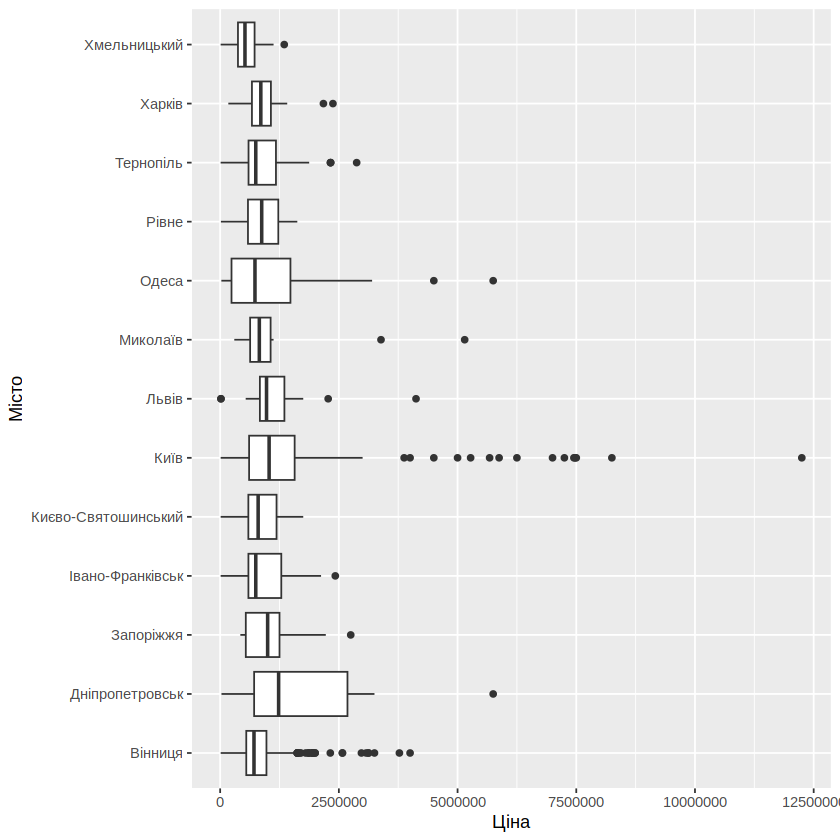

In [67]:
ggplot(flats, aes(x = Ціна, y = Місто)) +
  geom_boxplot()